In [ ]:
reas

# Descomposición de Series

Month,X.Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


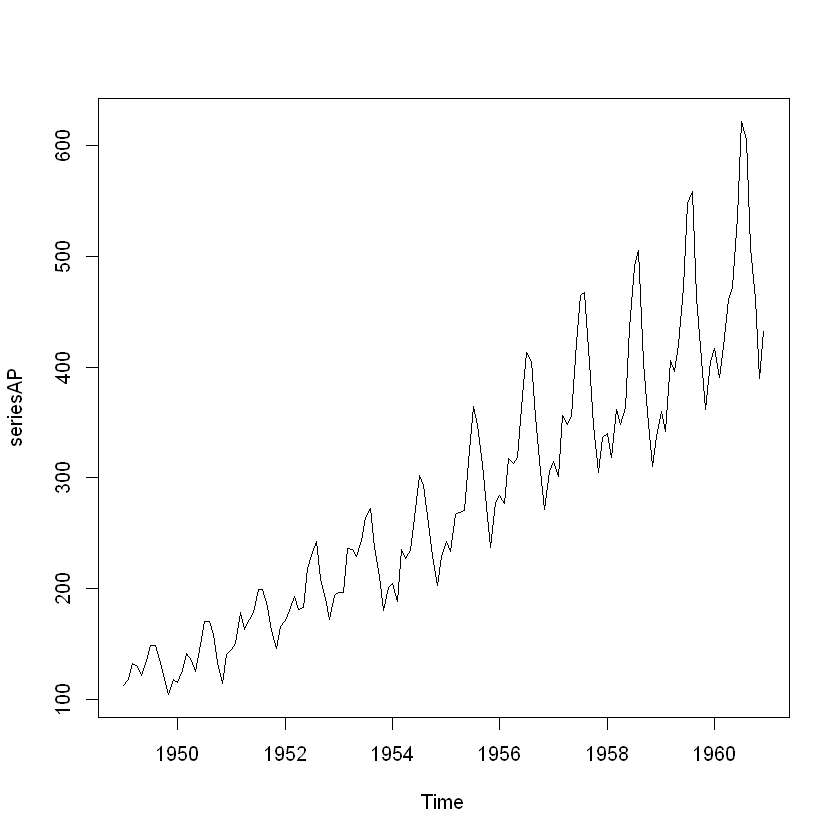

In [1]:
AirPassengers <- read.csv("AirPassengers.csv")
AirPassengers
seriesAP=ts(AirPassengers$X.Passengers,start=c(1949,1),frequency=12)
seriesAP
plot(seriesAP)

# Descomposición de promedio móvil usando R

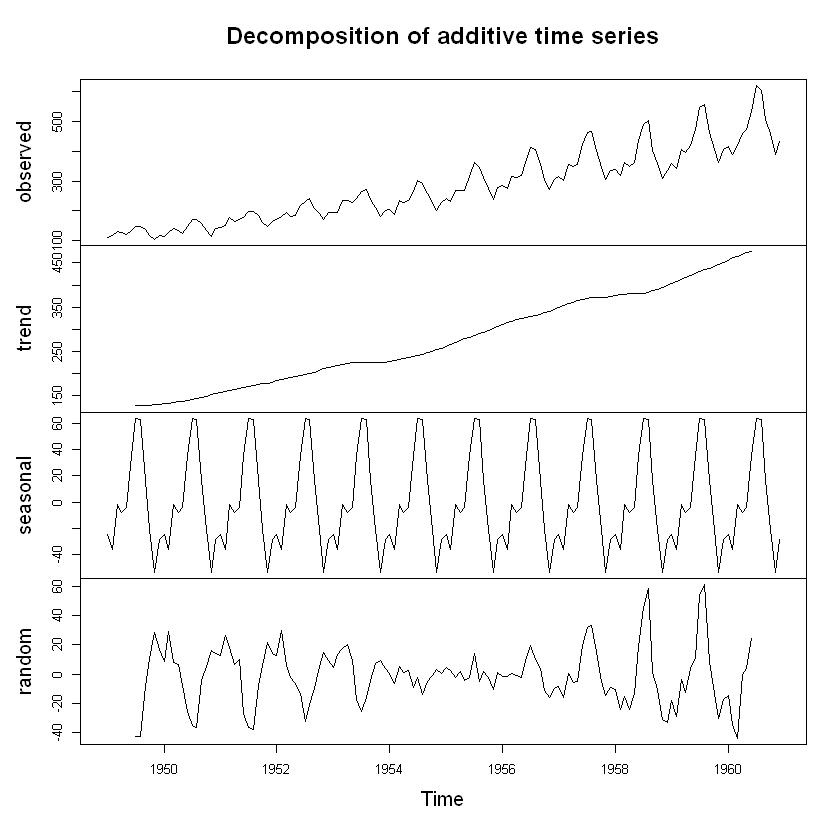

In [3]:
descomposicionAP=decompose(seriesAP)
plot(descomposicionAP)

# Descomposción usando Holt-Winters

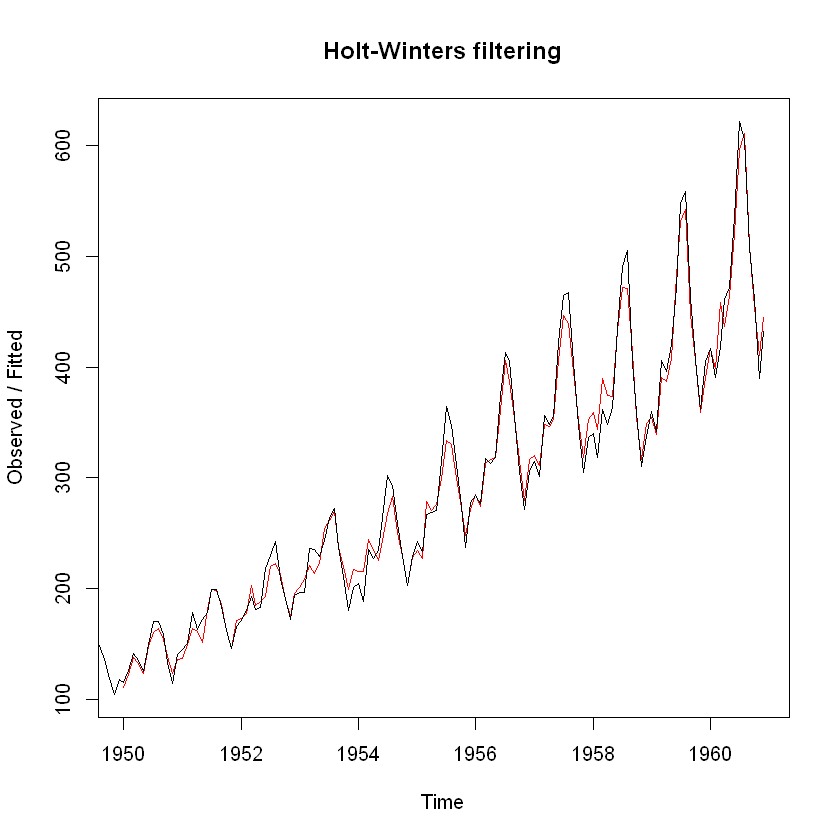

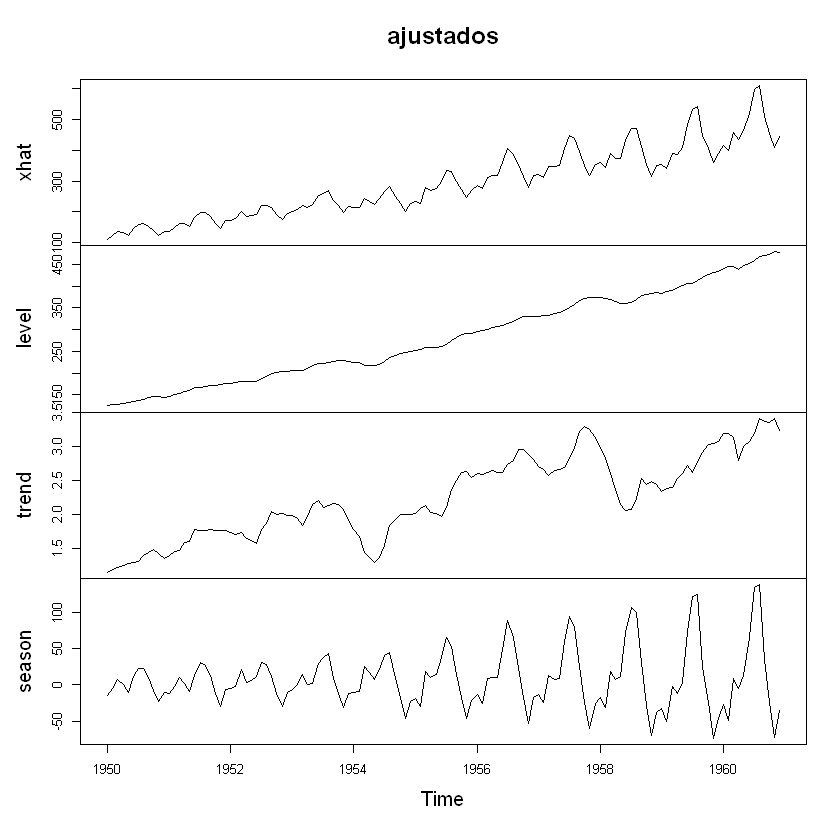

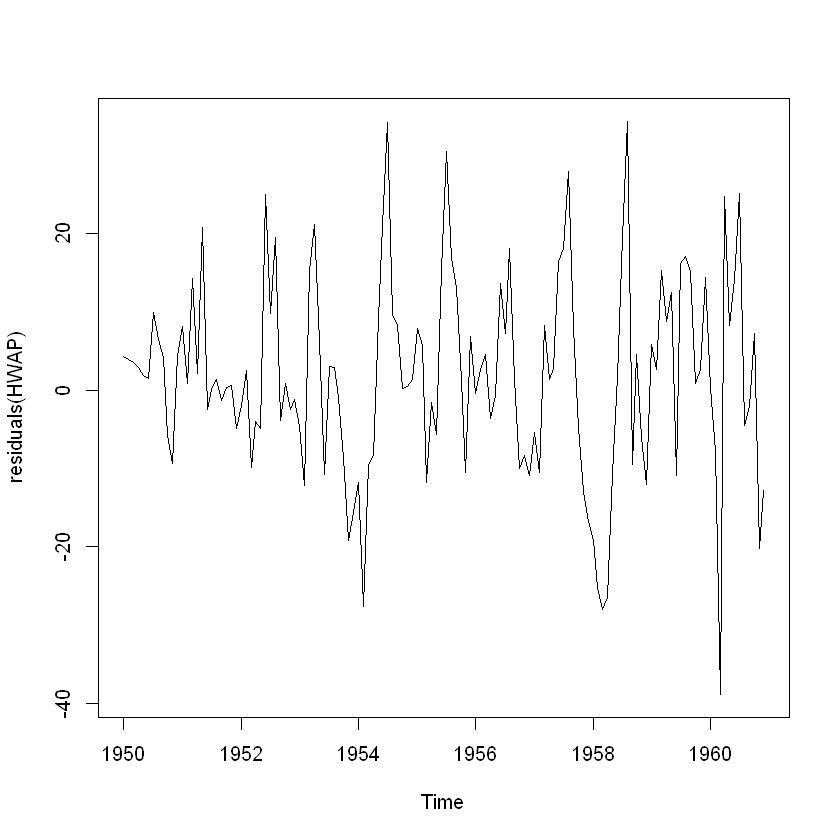

In [16]:
HWAP=HoltWinters(seriesAP,seasonal="additive")
plot(HWAP)
ajustados=fitted(HWAP)
plot(ajustados)
plot(residuals(HWAP))

Negro serie original  
Rojo serie ajustada, predicción con valores en tiempos anteriores y los parametros estimados de Holt-Winters

# Diferenciación usando R

En R también es posible hacer diferenciaciones usando la función diff

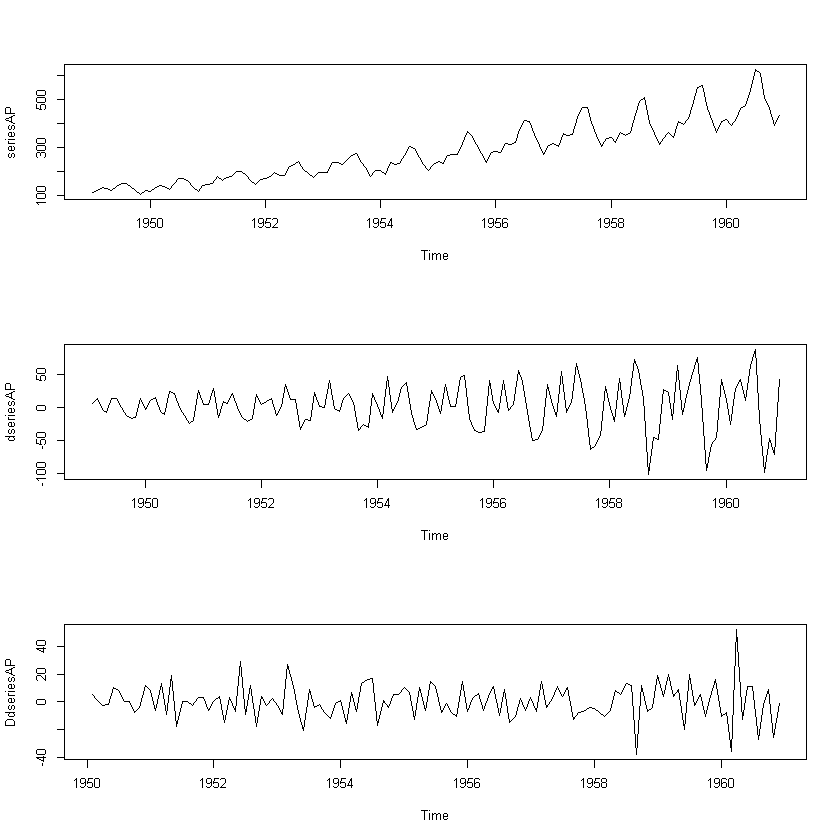

In [20]:
par(mfrow=c(3,1))
plot(seriesAP)
dseriesAP=diff(seriesAP,1,1) #Quita tendencia
plot(dseriesAP)
DdseriesAP=diff(dseriesAP,12,1) #Quita estacionalidad --> serie estacionaria
plot(DdseriesAP)

# Tranformación Box-Cox en R

In [4]:
library(forecast)
#method = c("guerrero", "loglik") #Min log-verosimilitud vs. min coef variacion (para estabilizar varianza)*
BoxCox.lambda(seriesAP,method="loglik") #Encuentra valor de lamnda para aplicar a transformacion BoxCox

[1] 0.2

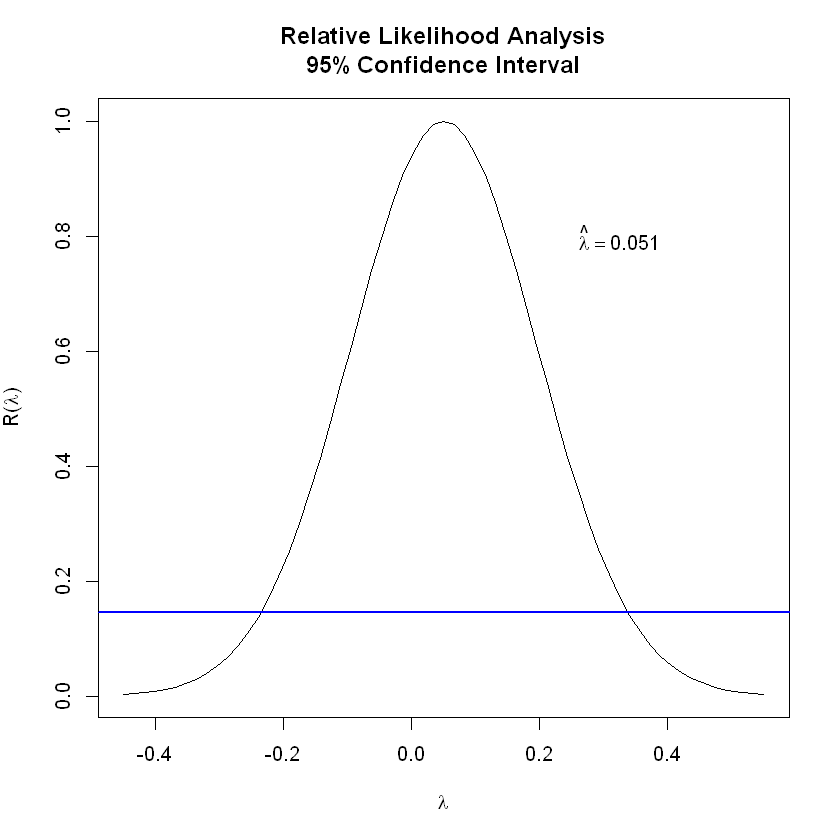

In [5]:
#install.packages("FitAR")
library(FitAR)
BoxCox(seriesAP,interval = c(-1, 2)) #Encuentra intervalo de confianza para lamnda. si lamnda=1 no deberia sugerir transformacion de los datos

Intervalo captura el 0. sugerencia usar transformación logaritmica.  
Ventaja de TrBoxCox. Tiene inversa, puede obtener la original.

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950,4.744932,4.836282,4.948760,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642
1951,4.976734,5.010635,5.181784,5.093750,5.147494,5.181784,5.293305,5.293305,5.214936,5.087596,4.983607,5.111988
1952,5.141664,5.192957,5.262690,5.198497,5.209486,5.384495,5.438079,5.488938,5.342334,5.252273,5.147494,5.267858
1953,5.278115,5.278115,5.463832,5.459586,5.433722,5.493061,5.575949,5.605802,5.468060,5.351858,5.192957,5.303305
1954,5.318120,5.236442,5.459586,5.424950,5.455321,5.575949,5.710427,5.680173,5.556828,5.433722,5.313206,5.433722
1955,5.488938,5.451038,5.587249,5.594711,5.598422,5.752573,5.897154,5.849325,5.743003,5.613128,5.468060,5.627621
1956,5.648974,5.624018,5.758902,5.746203,5.762051,5.924256,6.023448,6.003887,5.872118,5.723585,5.602119,5.723585
1957,5.752573,5.707110,5.874931,5.852202,5.872118,6.045005,6.142037,6.146329,6.001415,5.849325,5.720312,5.817111
1958,5.828946,5.762051,5.891644,5.852202,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950,4.744932,4.836282,4.948760,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642
1951,4.976734,5.010635,5.181784,5.093750,5.147494,5.181784,5.293305,5.293305,5.214936,5.087596,4.983607,5.111988
1952,5.141664,5.192957,5.262690,5.198497,5.209486,5.384495,5.438079,5.488938,5.342334,5.252273,5.147494,5.267858
1953,5.278115,5.278115,5.463832,5.459586,5.433722,5.493061,5.575949,5.605802,5.468060,5.351858,5.192957,5.303305
1954,5.318120,5.236442,5.459586,5.424950,5.455321,5.575949,5.710427,5.680173,5.556828,5.433722,5.313206,5.433722
1955,5.488938,5.451038,5.587249,5.594711,5.598422,5.752573,5.897154,5.849325,5.743003,5.613128,5.468060,5.627621
1956,5.648974,5.624018,5.758902,5.746203,5.762051,5.924256,6.023448,6.003887,5.872118,5.723585,5.602119,5.723585
1957,5.752573,5.707110,5.874931,5.852202,5.872118,6.045005,6.142037,6.146329,6.001415,5.849325,5.720312,5.817111
1958,5.828946,5.762051,5.891644,5.852202,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083


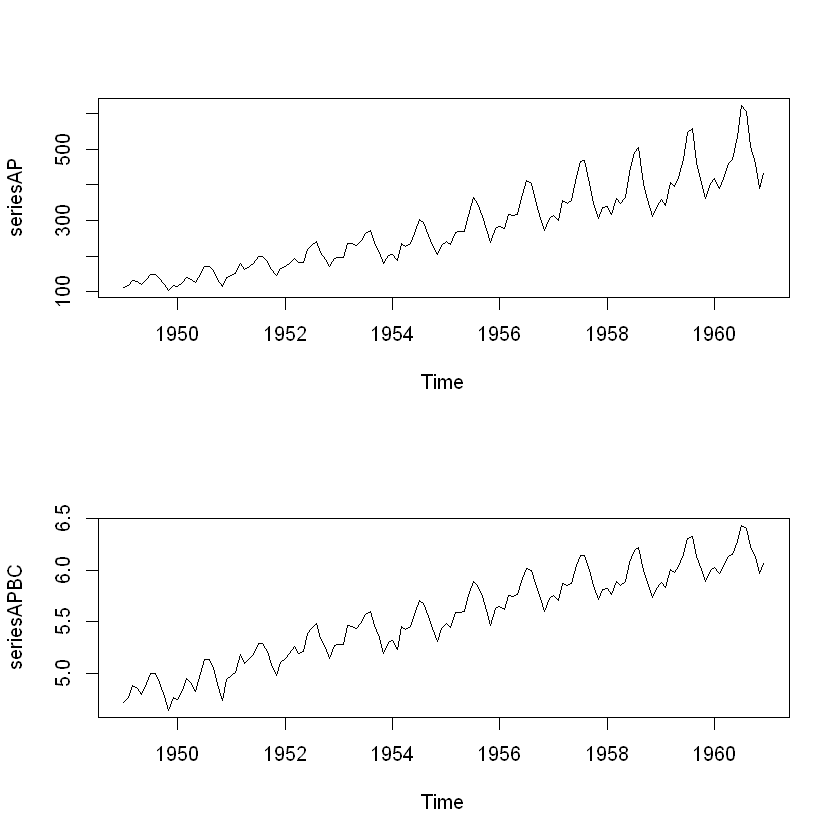

In [6]:
seriesAPBC=forecast::BoxCox(seriesAP,lambda=0)
seriesAPBC
lseriesAP=log(seriesAP)
lseriesAP #igual a seriesAPBC
par(mfrow=c(2,1))
plot(seriesAP)
plot(seriesAPBC)

# Tarea
Una vez removida la hererocedasticidad con la transformación BoxCox. Aplicar los métodos para descomponer la serie

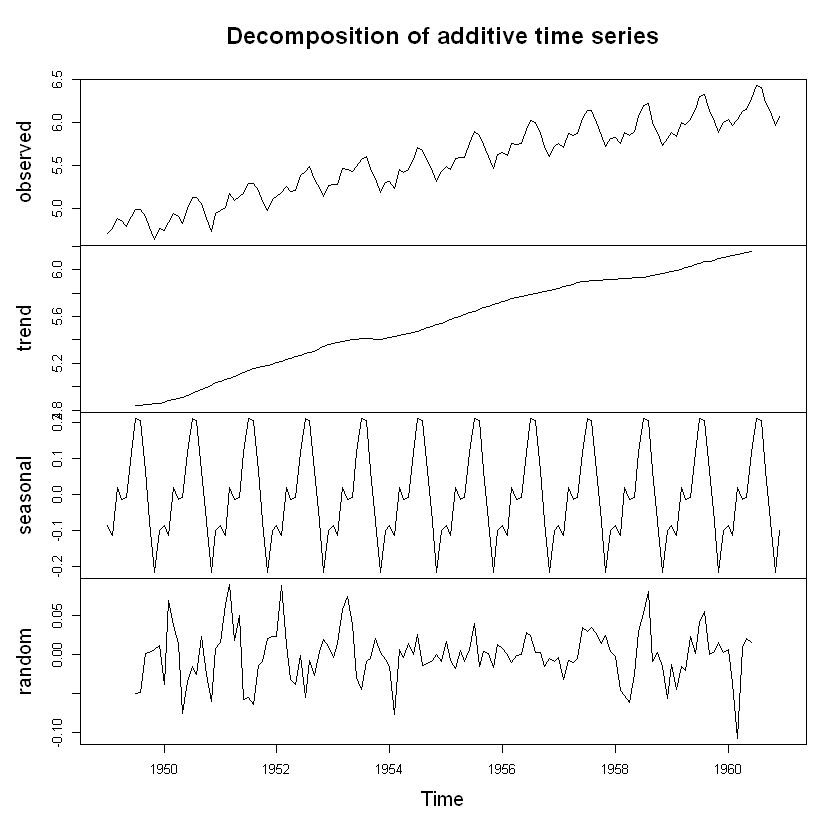

In [7]:
#Descomposición de promedio móvil
descomposicionAPBC=decompose(seriesAPBC)
plot(descomposicionAPBC)

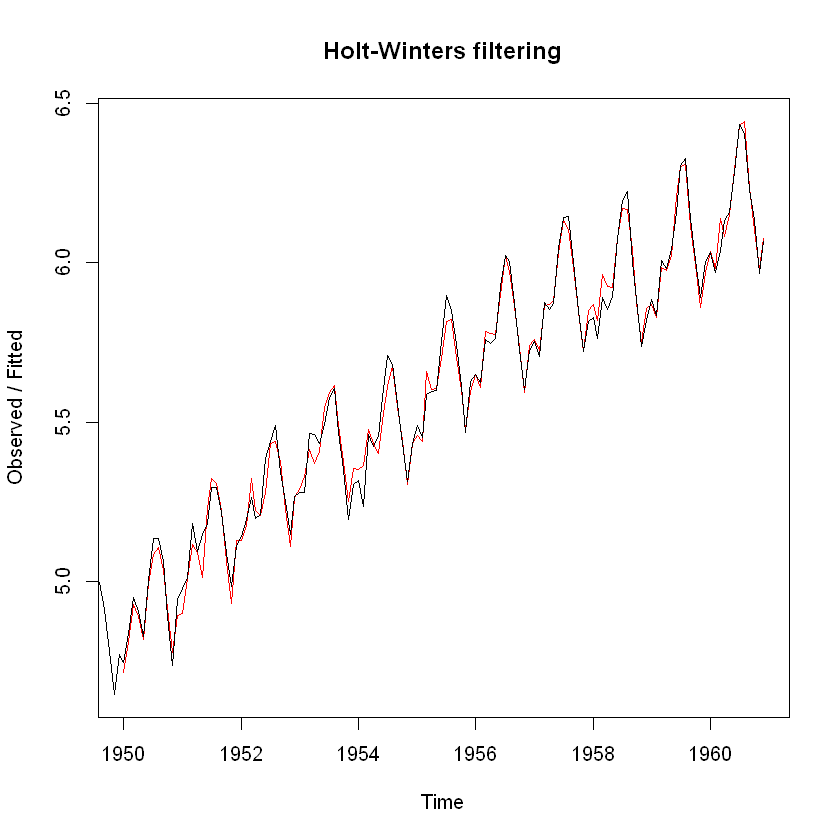

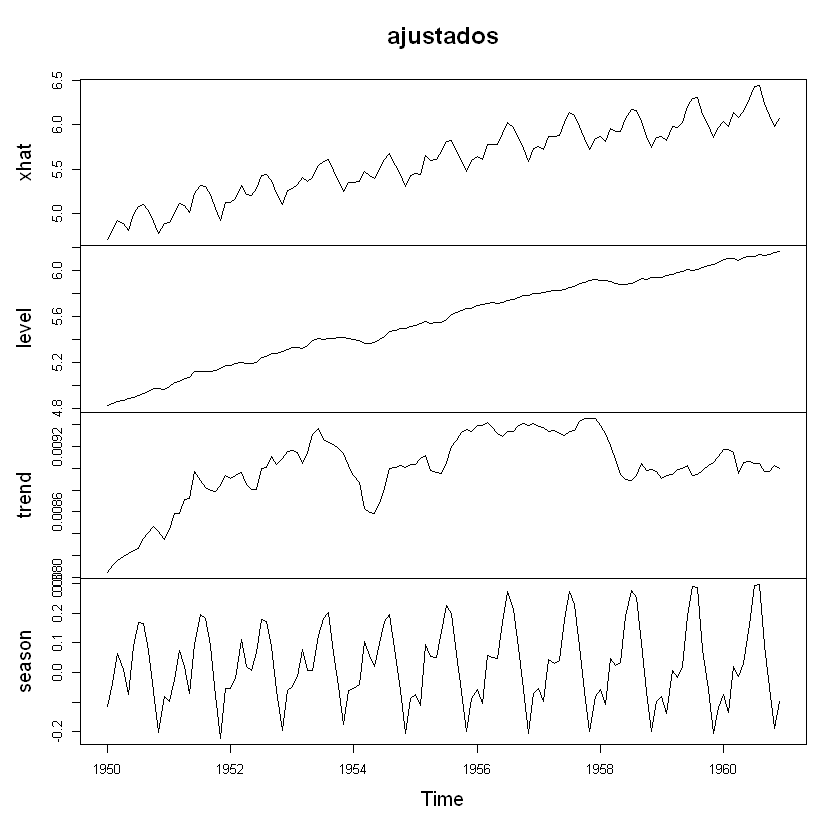

In [13]:
#Descomposción usando Holt-Winters
HWAPBC=HoltWinters(seriesAPBC,seasonal="additive")
plot(HWAPBC)
ajustados=fitted(HWAPBC)
plot(ajustados)

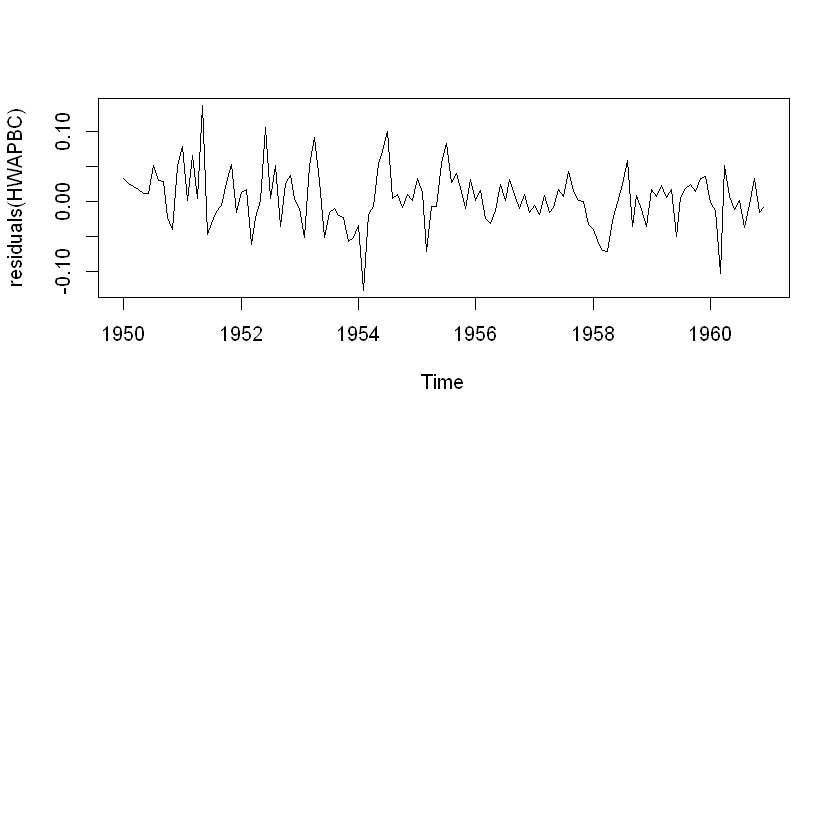

In [29]:
par(mfrow=c(2,1))
plot(residuals(HWAPBC))

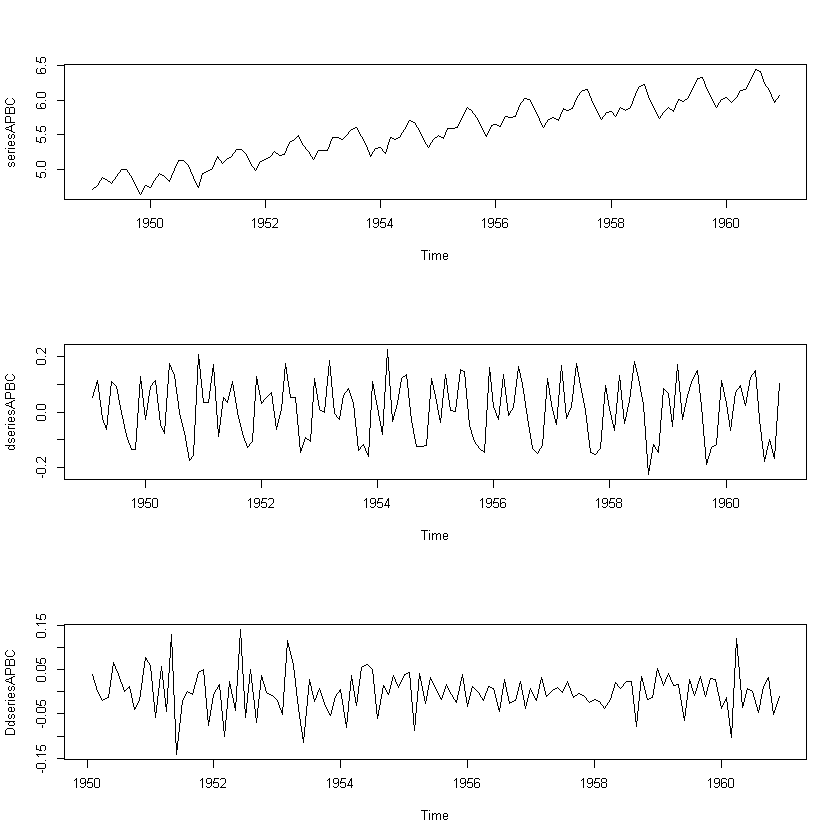

In [9]:
#Diferenciación
par(mfrow=c(3,1))
plot(seriesAPBC)
dseriesAPBC=diff(seriesAPBC,1,1) #Quita tendencia
plot(dseriesAPBC)
DdseriesAPBC=diff(dseriesAPBC,12,1) #Quita estacionalidad --> serie estacionaria
plot(DdseriesAPBC)

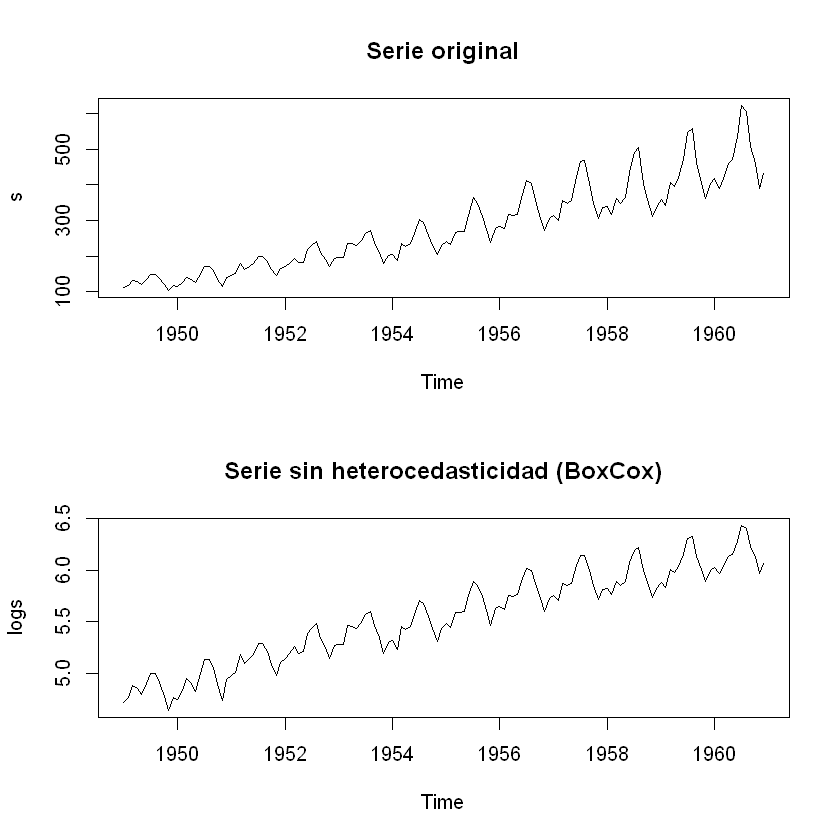

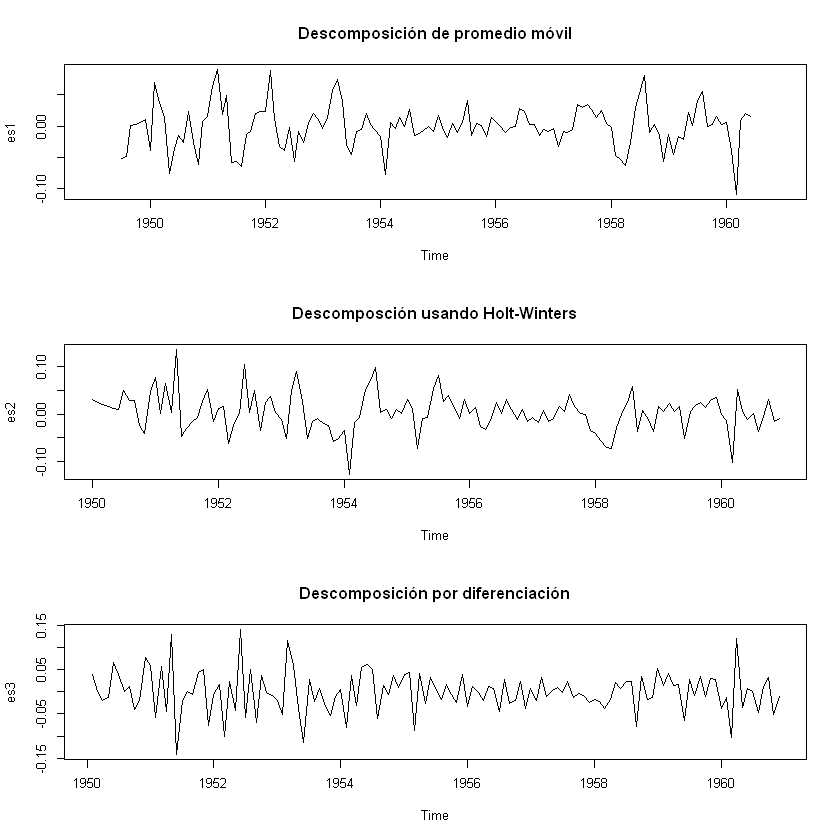

In [28]:
#Resumen
s <- seriesAP
logs <- seriesAPBC
es1 <- descomposicionAPBC$random
es2 <- residuals(HWAPBC)
es3 <- DdseriesAPBC

par(mfrow=c(2,1))
plot(s, main="Serie original")
plot(logs, main="Serie sin heterocedasticidad (BoxCox)")
par(mfrow=c(3,1))
plot(es1, main="Descomposición de promedio móvil")
plot(es2, main="Descomposción usando Holt-Winters")
plot(es3, main="Descomposición por diferenciación")

# Verificar Autocorrelación

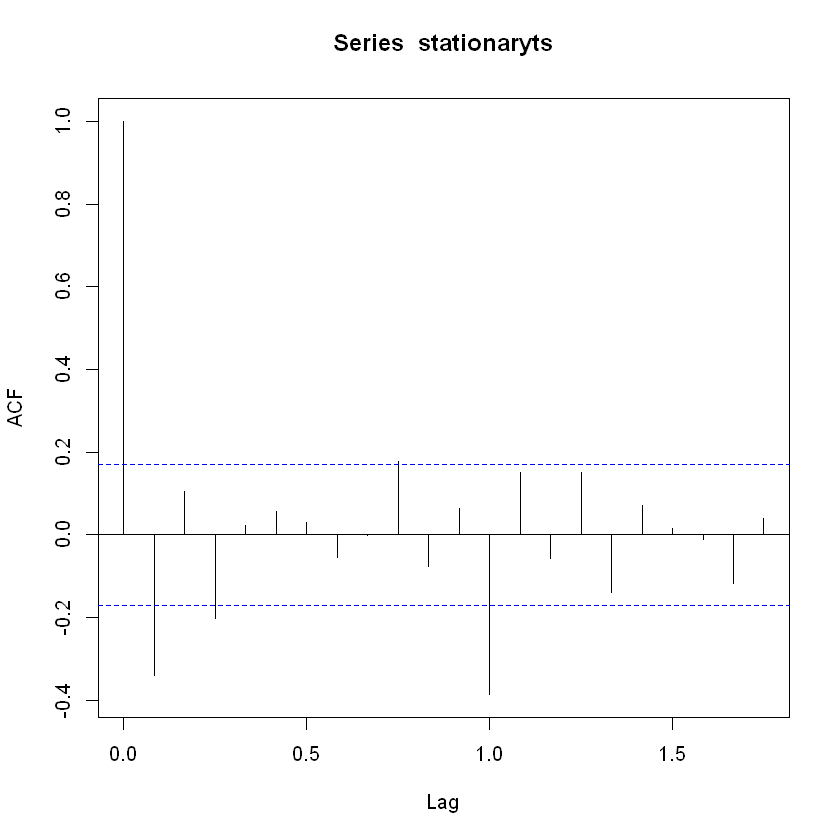

In [1]:
AirPassengers <- read.csv("AirPassengers.csv")
seriesAP=ts(AirPassengers$X.Passengers,start=c(1949,1),frequency=12)

#Remover heterocedasticidad
seriesAPBC=log(seriesAP)
#Remover tendencia
dseriesAPBC=diff(seriesAPBC,1,1) 
#Remover estacionalidad
DdseriesAPBC=diff(dseriesAPBC,12,1)

#Correlogramas
stationaryts = DdseriesAPBC
acf(stationaryts, plot=T) 

# Modelo ARMA
Si hay autocorrelación, se puede postular que la serie viene de un proceso ARMA.  
Se asume que proceso estacionario viene de un Modelo ARMA(p,q). Se van a estimar los parámetros del modelo

, , 1

               [,1]
 [1,]  1.0000000000
 [2,] -0.3411237983
 [3,]  0.1050467496
 [4,] -0.2021386642
 [5,]  0.0213592288
 [6,]  0.0556543435
 [7,]  0.0308036696
 [8,] -0.0555785695
 [9,] -0.0007606578
[10,]  0.1763686815
[11,] -0.0763581912
[12,]  0.0643839399
[13,] -0.3866128596
[14,]  0.1516020121
[15,] -0.0576067980
[16,]  0.1495652202
[17,] -0.1389421819
[18,]  0.0704823385
[19,]  0.0156307241
[20,] -0.0106106130
[21,] -0.1167285978
[22,]  0.0385542023

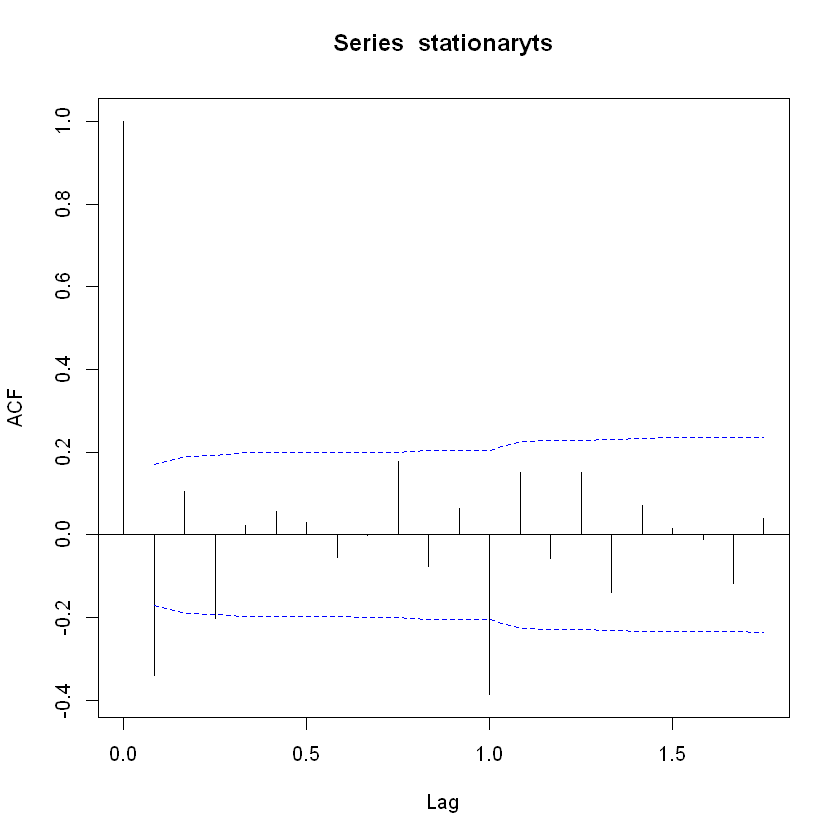

, , 1

             [,1]
 [1,] -0.34112380
 [2,] -0.01280925
 [3,] -0.19266244
 [4,] -0.12502837
 [5,]  0.03308966
 [6,]  0.03467738
 [7,] -0.06018693
 [8,] -0.02022315
 [9,]  0.22557672
[10,]  0.04307077
[11,]  0.04658824
[12,] -0.33869481
[13,] -0.10917865
[14,] -0.07683945
[15,] -0.02175078
[16,] -0.13954524
[17,]  0.02589186
[18,]  0.11482199
[19,] -0.01316229
[20,] -0.16743014
[21,]  0.13240396

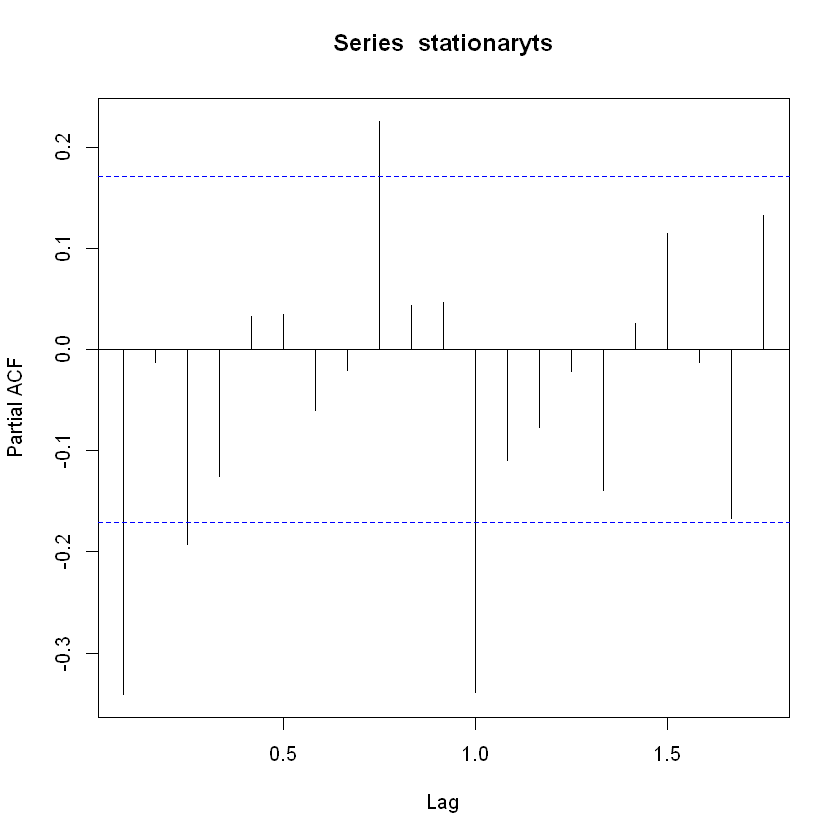

In [2]:
#Identificar órdenes p y q
acf(stationaryts, plot=T, ci.type='ma')$acf #Orden de MA (ARMA(0,q))
pacf(stationaryts, plot=T)$acf #Orden de AR (ARMA(p,0)) #Varianzas constantes, no bandas móviles

Gráfico de autocorrelaciones simple nos da el orden de un MA puro. Las varianzas no son constantes por lo tanto las bandas son móviles.  
Las autocorrelaciones parciales permiten identificar el orden de un AR puro. 

Se puede postular que la serie estacionaria es una realización de un modelo ARMA: AR(12) puro o MA(12) puro

In [24]:
library(forecast)
auto.arima(stationaryts, d=0, D=0, start.P=0, start.Q=0, ic="bic"); 

Series: stationaryts 
ARIMA(0,0,1)(0,0,1)[12] with zero mean 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001369:  log likelihood=244.7
AIC=-483.39   AICc=-483.2   BIC=-474.77

Autoarima postula MA(1) 

# Ajuste y verificación de Modelos ARMA
Se va a hacer para los modelos   
- AR(12) <- pacf
- MA(12) <- acf 
- MA(1) <- autoarima

# Detección de outliers